In [1]:
import rebound
import reboundxf
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.,x=1.)
sim.add(m=1.,x=2.)
xf = reboundxf.Params(sim)

In [2]:
xf.tau_pomega = [1,2,3]

In [3]:
print(xf.tau_pomega[1])

2.0


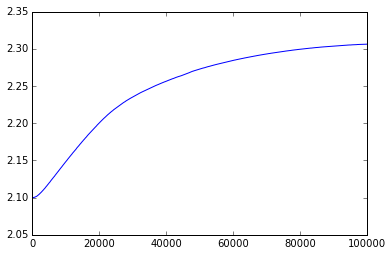

In [1]:
import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.force_is_velocity_dependent = 1
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()
tmax = 1.e5
sim.post_timestep_modifications = reboundxf.modify_elements()
taues = [0., 1.e5, 100.]
tauas = [0., 1.e10, 1.e7]
taupo = [0., 1.e5, 100.]
reboundxf.set_e_damping_p(1.)
reboundxf.set_e_damping(taues)
reboundxf.set_peri_precession(taupo)
reboundxf.set_migration(tauas)
Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)

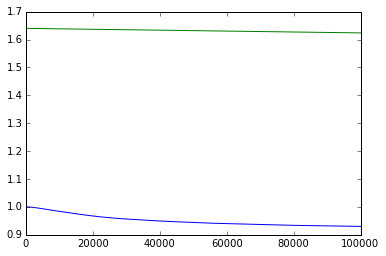

In [2]:
plt.plot(times,a1)
plt.plot(times,a2)

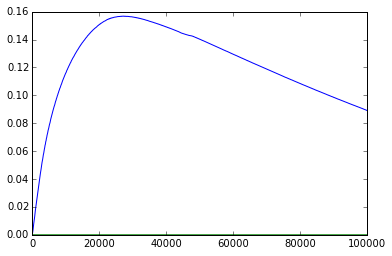

In [3]:
plt.plot(times,e1)
plt.plot(times,e2)

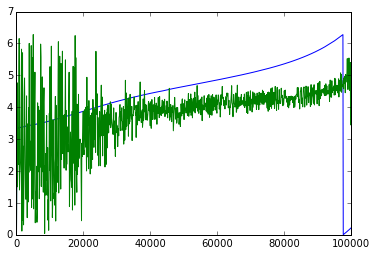

In [4]:
plt.plot(times,po1)
plt.plot(times,po2)

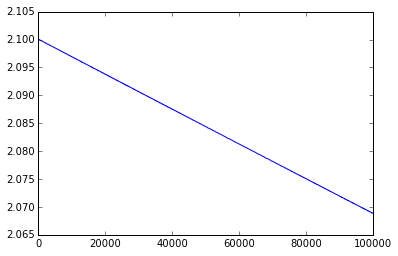

In [28]:
import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()
tmax = 1.e5
sim.post_timestep_modifications = reboundxf.modify_elements()
taues = [0., 1.e5, 100.]
tauas = [0., 1.e10, 1.e7]
taupo = [0., 1.e5, 0.]
reboundxf.set_e_damping_p(1.)
reboundxf.set_e_damping(taues)
reboundxf.set_peri_precession(taupo)
reboundxf.set_migration(tauas)
Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)

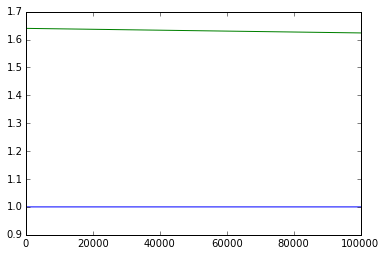

In [29]:
plt.plot(times,a1)
plt.plot(times,a2)

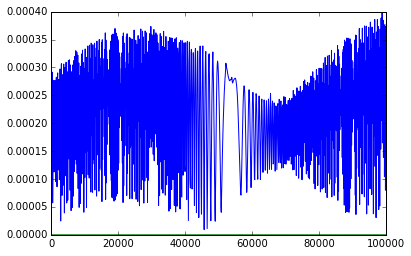

In [30]:
plt.plot(times,e1)
plt.plot(times,e2)

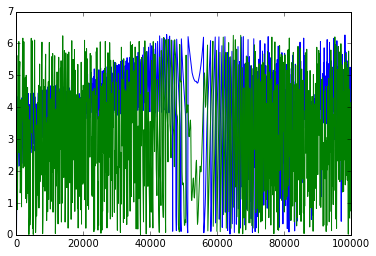

In [31]:
plt.plot(times,po1)
plt.plot(times,po2)

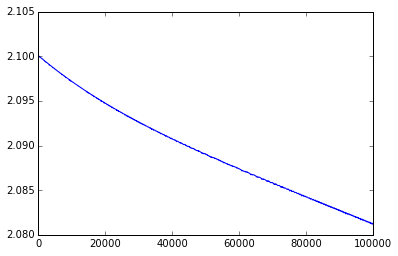

In [1]:
import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()
tmax = 1.e5
sim.post_timestep_modifications = reboundxf.modify_elements()
taues = [0., 1.e5, 100.]
tauas = [0., 1.e10, 1.e7]
taupo = [0., 1.e5, 1000.]
reboundxf.set_e_damping_p(1.)
reboundxf.set_e_damping(taues)
reboundxf.set_peri_precession(taupo)
reboundxf.set_migration(tauas)
Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)

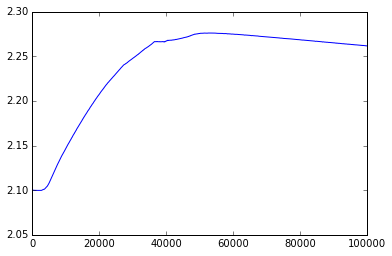

In [17]:
import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()
tmax = 1.e5
sim.post_timestep_modifications = reboundxf.modify_elements()
taues = [0., 0., 0.]
tauas = [0., 0., 1.e7]
taupo = [0., 0., 87.]
reboundxf.set_e_damping_p(0.)
reboundxf.set_e_damping(taues)
reboundxf.set_peri_precession(taupo)
reboundxf.set_migration(tauas)
Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
x1 = np.zeros(Nout)
x2 = np.zeros(Nout)
y1 = np.zeros(Nout)
y2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P
    x1[i] = ps[1].x
    x2[i] = ps[2].x
    y1[i] = ps[1].y
    y2[i] = ps[2].y
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)

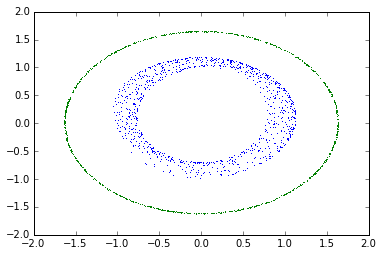

In [18]:
plt.plot(x1,y1, 'b,')
plt.plot(x2,y2,'g,')

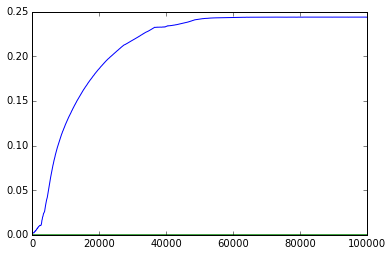

In [19]:
plt.plot(times,e1)
plt.plot(times,e2)

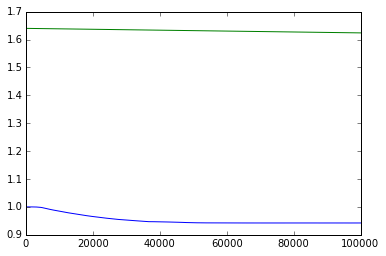

In [20]:
plt.plot(times,a1)
plt.plot(times,a2)